# Exercise - Regularization <a class="tocSkip">

Welcome to our third exercise. Today we are gonna look at the inner workings of different regularization approaches.

## Warm-up questions

**Question 1:** Which of the following is NOT a commonly used regularization technique in deep learning?

- L1 regularization
- L2 regularization
- Dropout regularization
- Gaussian regularization

<ul>
    
*Gaussian regularization*
 
</ul>

<a class="textSolution">

**Question 2:** What is the main advantage of using regularization in deep learning?

- It prevents the model from memorizing the training data and improves generalization performance
- It increases the number of parameters in the model, making it more flexible
- It reduces the computational cost of training the model
- It makes the model converge faster to the optimal solution

<ul>
    
*It prevents the model from memorizing the training data and improves generalization performance*
 
</ul>

<a class="textSolution">

**Question 3:** Which of the following statements is true regarding L1 regularization in deep learning?

- L1 regularization reduces the magnitude of the weights of the neural network
- L1 regularization randomly drops out neurons during training
- L1 regularization encourages sparsity in the weights of the neural network
- L1 regularization combines multiple models to improve generalization performance

<ul>
    
*L1 regularization encourages sparsity in the weights of the neural network.*
 
</ul>

<a class="textSolution">

**Question 4:** Which of the following is a disadvantage of using ensemble methods for regularization in deep learning?

- Ensemble methods require more computational resources compared to other regularization techniques
- Ensemble methods do not improve the generalization performance of deep learning models
- Ensemble methods make it difficult to interpret the trained model
- Ensemble methods are prone to overfitting on the training data

<ul>
    
*Ensemble methods require more computational resources compared to other regularization techniques*
 
</ul>

<a class="textSolution">

**Question 5:** What is the main advantage of using early stopping as a regularization technique in deep learning?

- Early stopping speeds up the convergence of the model during training
- Early stopping prevents the model from learning the noise in the training data
- Early stopping improves the interpretability of the trained model
- Early stopping reduces the risk of overfitting the training data

<ul>
    
*Early stopping reduces the risk of overfitting the training data*
 
</ul>

<a class="textSolution">

## Capacity

Please explain in your own words what the capacity of a model describes and why this capacity is important.

<ul>

*Solution:*

The capacity of a deep learning model is determined by its architecture, which includes the number of layers, the number of neurons in each layer, and the activation functions used. A model with more layers and neurons has higher capacity and can learn more complex patterns in the data.

A model's capacity is important because it determines its ability to generalize to new, unseen data. A model with high capacity may overfit to the training data, memorizing noise and idiosyncrasies in the training data that do not generalize well to the test data. On the other hand, a model with low capacity may underfit the training data, failing to capture the relevant patterns and relationships needed to make accurate predictions on the test data.
 
</ul>

<a class="textSolution">

Sketch the problem of optimal capacity. Include the overfitting and underfitting zone, the curves for training and generalization error, and mark the generalization gap.

<ul>

*Solution:*
<p style="text-align: center">
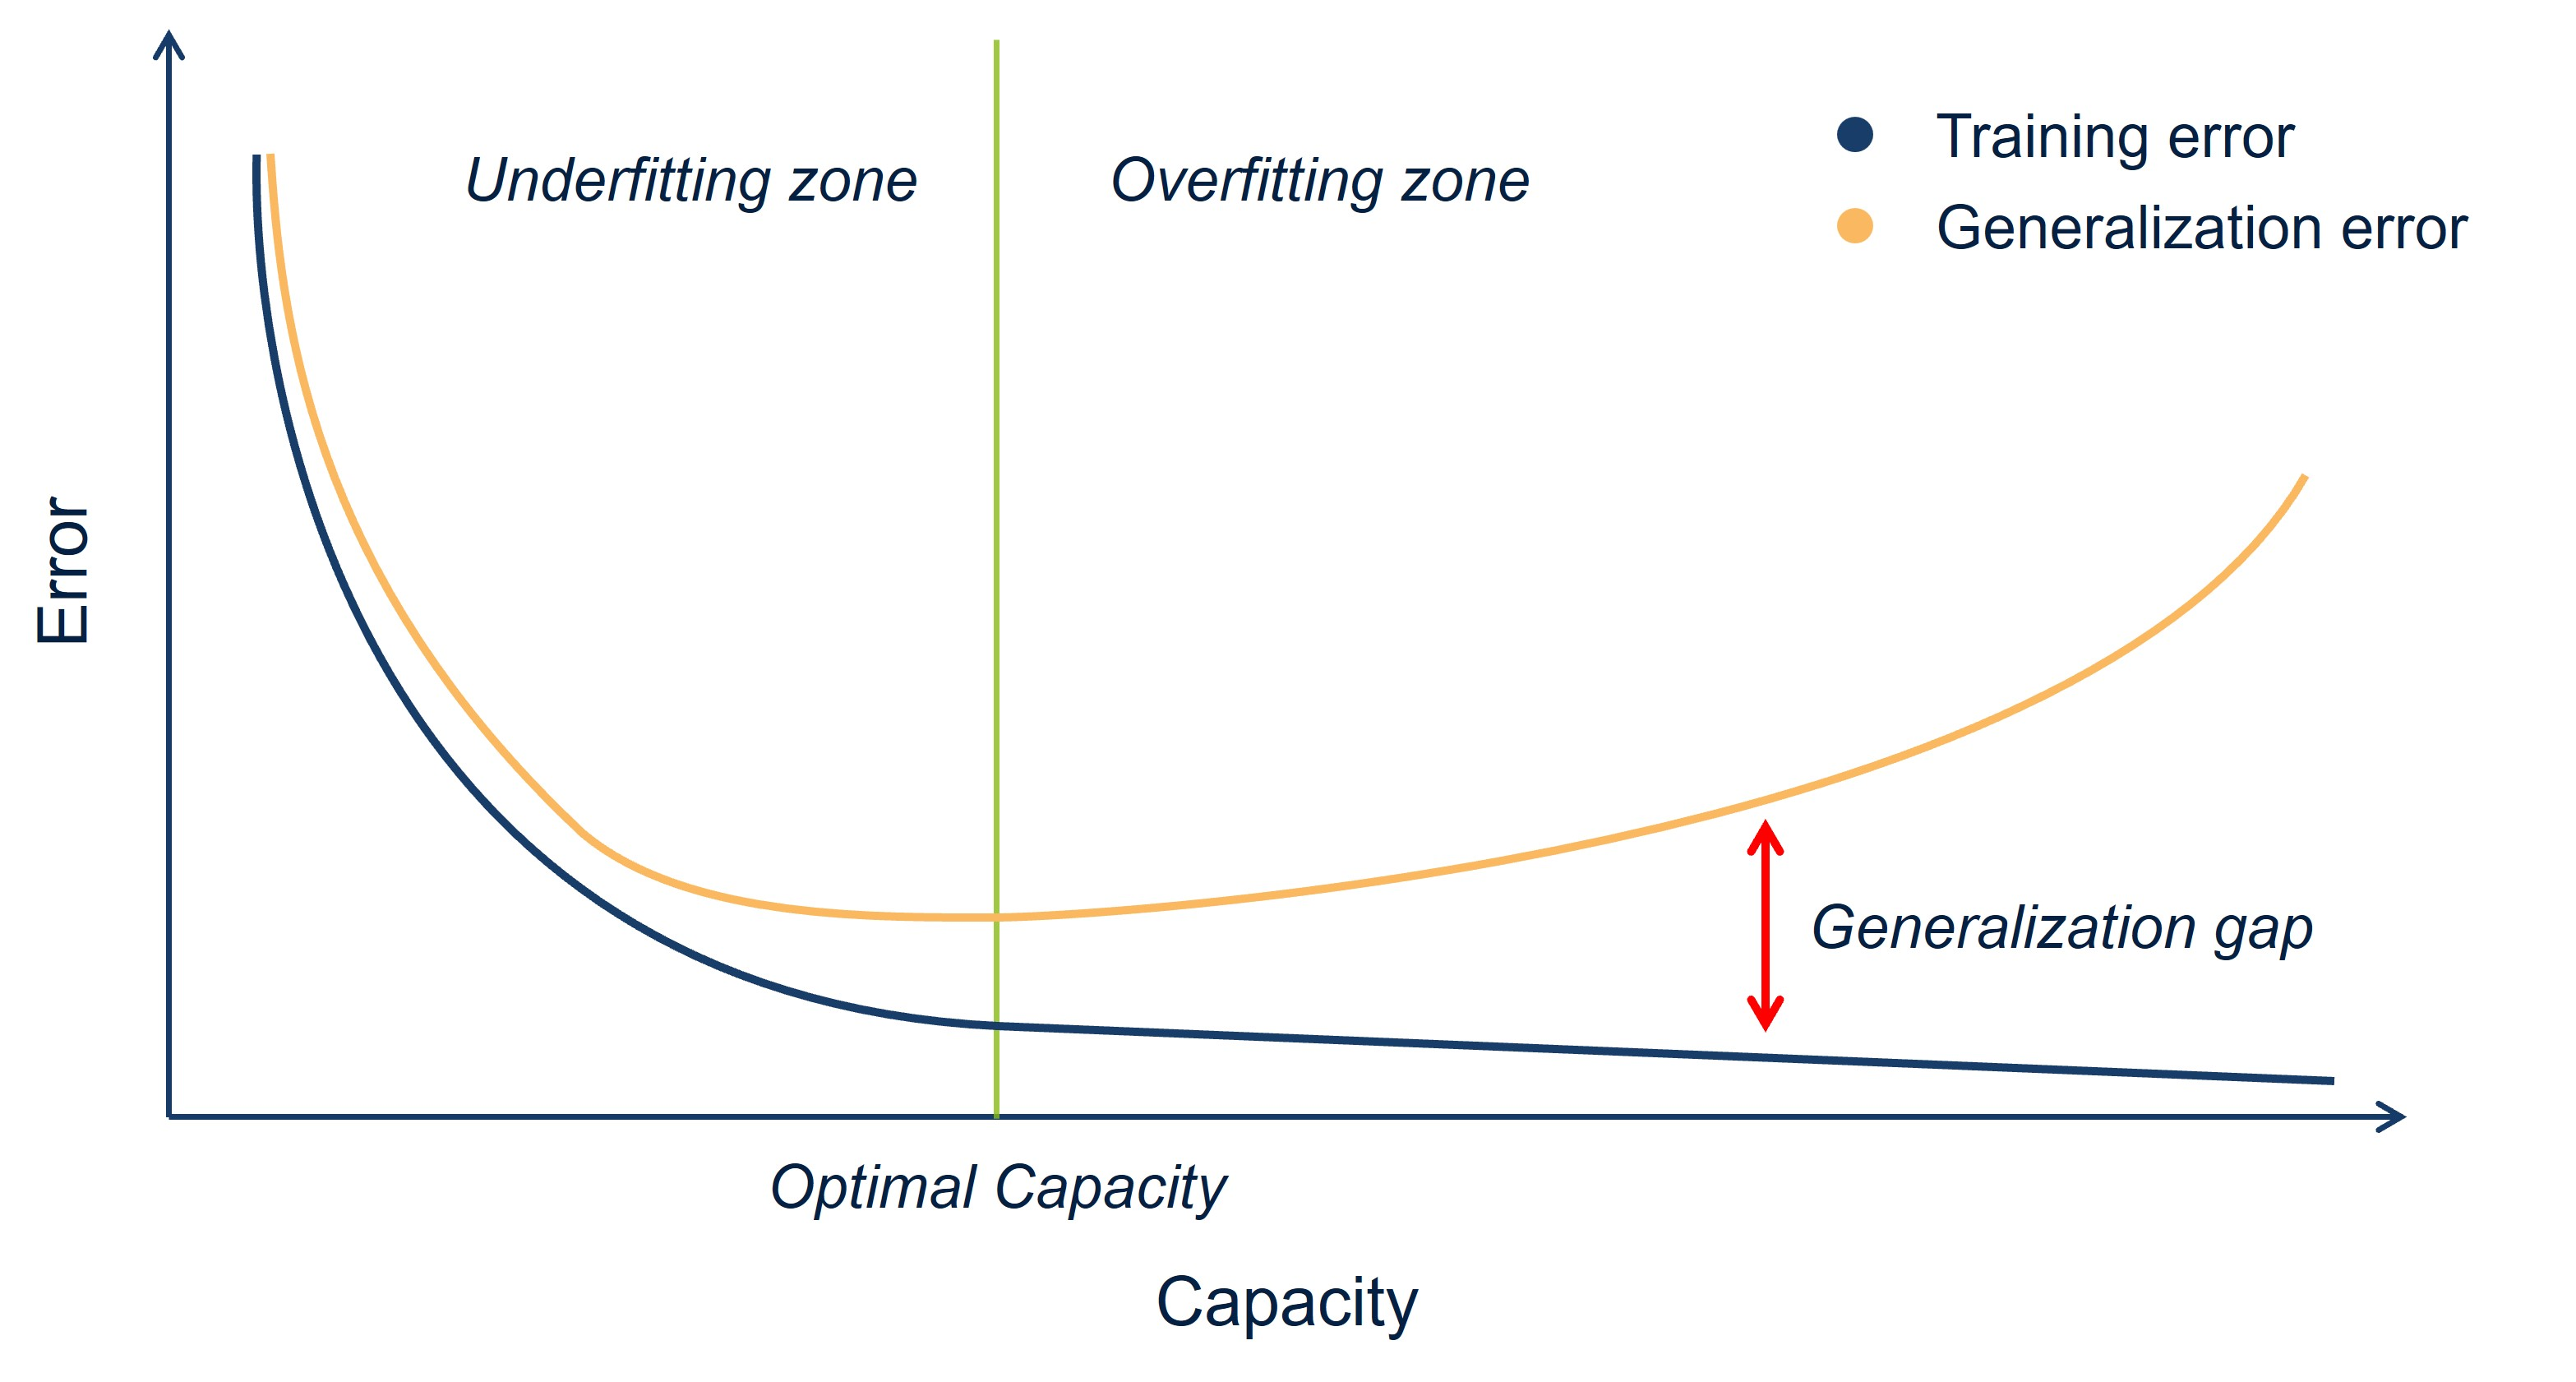
</p>

</ul>

<a class="textSolution">

## L2 and L1 regularization

### L2 regularization

Given a neural network, which is evaluated by the MSE loss and L2 regularization.

$$
l(y^*,y)= \frac{1}{N} \sum_i^N (y_i^*-y_i )^2 + \lambda \sum_{j}^{P} w_{j}^{2}
$$

Calculate the influence of a single weight on the change of the cost function, i.e. $\nabla_{w} l (y^*)$. Discuss the choice of learning rate and regularization rate as a function of the training iterations needed to adjust the weight. Assume that the error $y^* - y$ is of order 1.

Hint: $y^*$ does not need to be derived.

<ul>
 
*We can derive*

$
\begin{align*}
\nabla_{w} l (y^*)
&=
\nabla_{w} \left( \left( y^* - y \right)^2 + \lambda w^2 \right) \\
&=
\nabla_{w} \left( \left( y^* - y \right)^2 \right) + \nabla_{w} \left( \lambda w^2 \right)  \\
&=
\nabla_{w} \left( \left( y^* - y \right)^2 \right) + 2 \lambda w \\
&=
 2 \left( y^* - y \right) \nabla_{w} y^*  + 2 \lambda w
\end{align*}
$

*and with*

$
w \to w - \alpha \frac{\partial l}{\partial w} \to w - \frac{\widehat{\alpha}}{2} \frac{\partial l}{\partial w}
$

*using the substitution*

$
2 \alpha = \widehat{\alpha}
$
    
*we get*

$
w \to w - \widehat{\alpha} \left( \left( \left( y^* - y \right) \nabla_{w}y^* \right) +\lambda w \right)
=
\color{red}{(1-\widehat{\alpha}\lambda)}w - \widehat{\alpha} (y^* - y) \nabla_{w}y^*
$

*The weights are drawn from $\mathcal{N}(\mu = 0,\, \sigma = 1)$ during initialization. With each iteration step the weight is decreased by a factor of $(1 - \widehat{\alpha}\lambda)$ with $(\widehat{\alpha},\,\lambda < 1)$. Thus, after $k$ iteration steps, the weight is decreased by a factor of $(1 - \widehat{\alpha}\lambda)^k$.*

*If possible, the value of the weight should be able to take any value on the scale of $\mathcal{N}(\mu = 0,\, \sigma = 1)$ over the course of the entire training.*

*For example, with $k \approx 10^4$ and $\widehat{\alpha} \approx 10^{-3}$ and $\lambda = 1$ we get $(1 - \widehat{\alpha}\lambda)^k \approx 10^{-5}$, so that the scale on which the weights are fitted is greatly shrunk. A suitable choice of $\lambda \approx 10^{-2}$ yields $(1 - \widehat{\alpha}\lambda)^k \approx 0.9$, and reduces the strong constraint on the choice of weights.*

</ul>

<a class="textSolution">

### L1 regularization

Given a neural network, which is evaluated by the MSE loss and L1 regularization.

$$
l(y^*,y)= \frac{1}{N} \sum_i^N (y_i^*-y_i )^2 + \lambda \sum_{j}^{P} | w_{j} |
$$

Calculate the influence of a single weight on the change of the cost function, i.e. $\nabla_{w} l (y^*)$. Discuss the impact of regularization on weight adjustment. What happens to the weights for $0 < \lambda < 1$? What is the effect of regularization on networks with ReLU activation?

Hint: $y^*$ does not need to be derived.

<ul>

*We can derive*

$
\begin{align*}
\nabla_{w} l (y^*)
&=
\nabla_{w} \left( \left( y^* - y \right)^2 + \lambda |w| \right) \\
&=
\nabla_{w} \left( \left( y^* - y \right)^2 \right) + \nabla_{w} \left( \lambda |w| \right)  \\
&=
\nabla_{w} \left( \left( y^* - y \right)^2 \right) + \lambda \operatorname{sign}(w)
\end{align*}
$

*and with*

$
w \to w - \alpha \frac{\partial l}{\partial w}
$

*we get*

$
w \to w - \alpha \left( \nabla_{w} \left( \left( y^* - y \right)^2 \right) + \color{red}{\lambda \operatorname{sign}}(w) \right)
$

*The loss should become minimal, it follows that $\lambda |w|$ becomes small, it follows that $w$ goes towards $0$ (from both sides). In case of ReLu activation, this can cause certain paths of the network to be turned off. Thus, L1 regularization indirectly reduces the capacity of the network.*

</ul>

<a class="textSolution">

## Learning rate scheduling

Given a neural network that is trained for a regression problem. The choice of the **learning rate $\alpha$ depends on the shape of the cost function**, in particular on the dependence of the weights $l(\boldsymbol{w})$. 

### Influence of the learning rate

Discuss the appropriate choice of $\alpha$ using a sketch of $l(\boldsymbol{w})$ and clarify the facts of the three cases:

1) $\alpha$ chosen too small

2) $\alpha$ chosen appropriately 

3) $\alpha$ chosen too large

<ul>

*Solution:*
<p style="text-align: center">
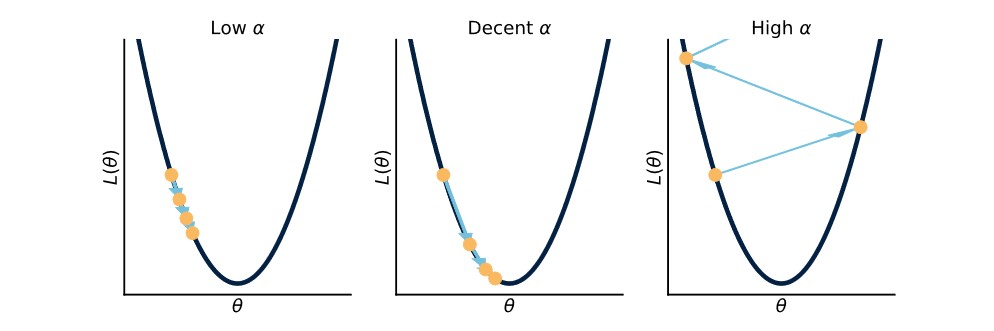
</p>

If $\alpha$ is chosen too small, the training process will be slow, and the model may take a long time to converge to an optimal solution. The risk with such a low learning rate is that the model may get stuck in a local minimum.

If $\alpha$ is chosen appropriately, the training process should be efficient, and the model should converge to an optimal solution relatively quickly. This means that the learning rate is large enough to take large enough steps towards the optimal solution, but not so large that they cause the model to overshoot the optimal solution.

If $\alpha$ is chosen too large, the training process can become unstable, and the model may fail to converge to an optimal solution. The model may overshoot the optimal solution, causing the loss to increase instead of decrease.

</ul>

<a class="textSolution">

### Test vs. train

Consider the problem that the shape of $l(\boldsymbol{w})$ for the test data may differ from the shape for the training data. Illustrate the problem with a sketch contrasting the two trajectories. What is the concrete problem for reaching a local minimum in training and evaluating the corresponding weights in the test case?

<ul>

*Solution:*
<p style="text-align: center">
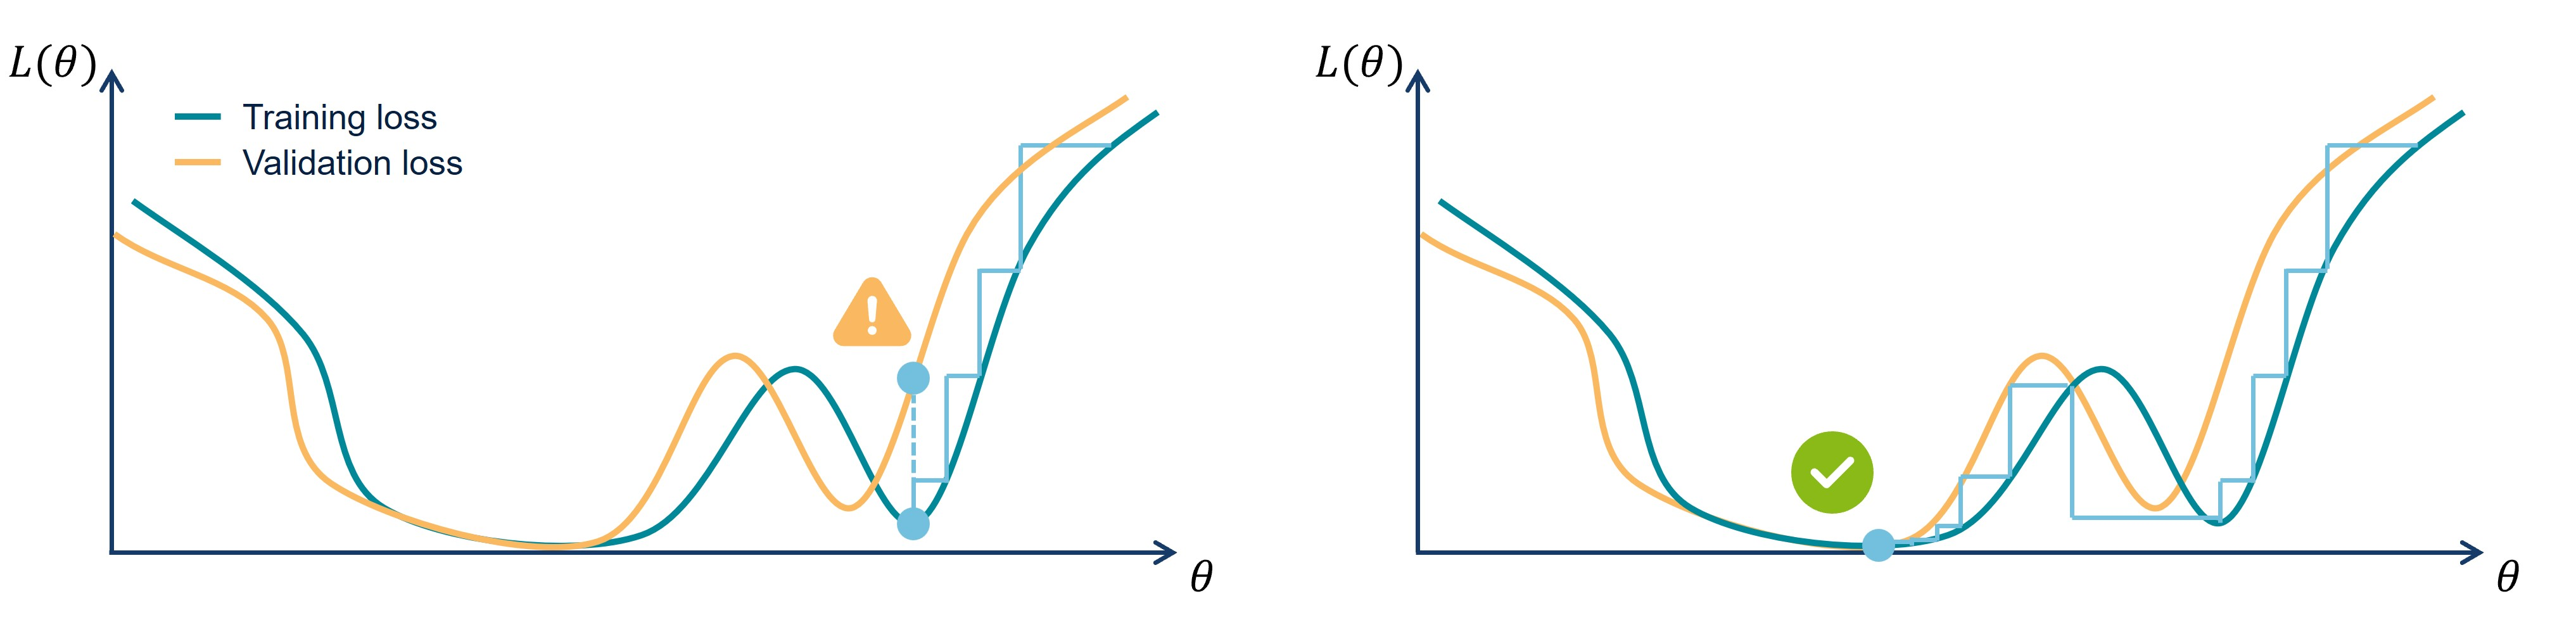
</p>

When the shape of the loss function for the test data differs from the shape of the loss function for the training data, it is known as a "distributional shift" or "dataset shift" problem.

One of the specific problems of distribution shift is that it can cause the model to reach a local minimum during training that is not optimal for the test data. When evaluating the corresponding weights in the test case, this problem can lead to poor generalization performance, where the model's performance on the test data is significantly worse than its performance on the training data. This happens because the model has learned to fit the statistical properties of the training data, which do not generalize well to the test data.

</ul>

<a class="textSolution">

### Multiple minima

Consider a graph of the cost function with multiple local minima. How can $\alpha$ be chosen, depending on the training progress, in such a way that every minimum can be reached? Illustrate the situation in a sketch.

<ul>

*Solution:*

<p style="text-align: center">
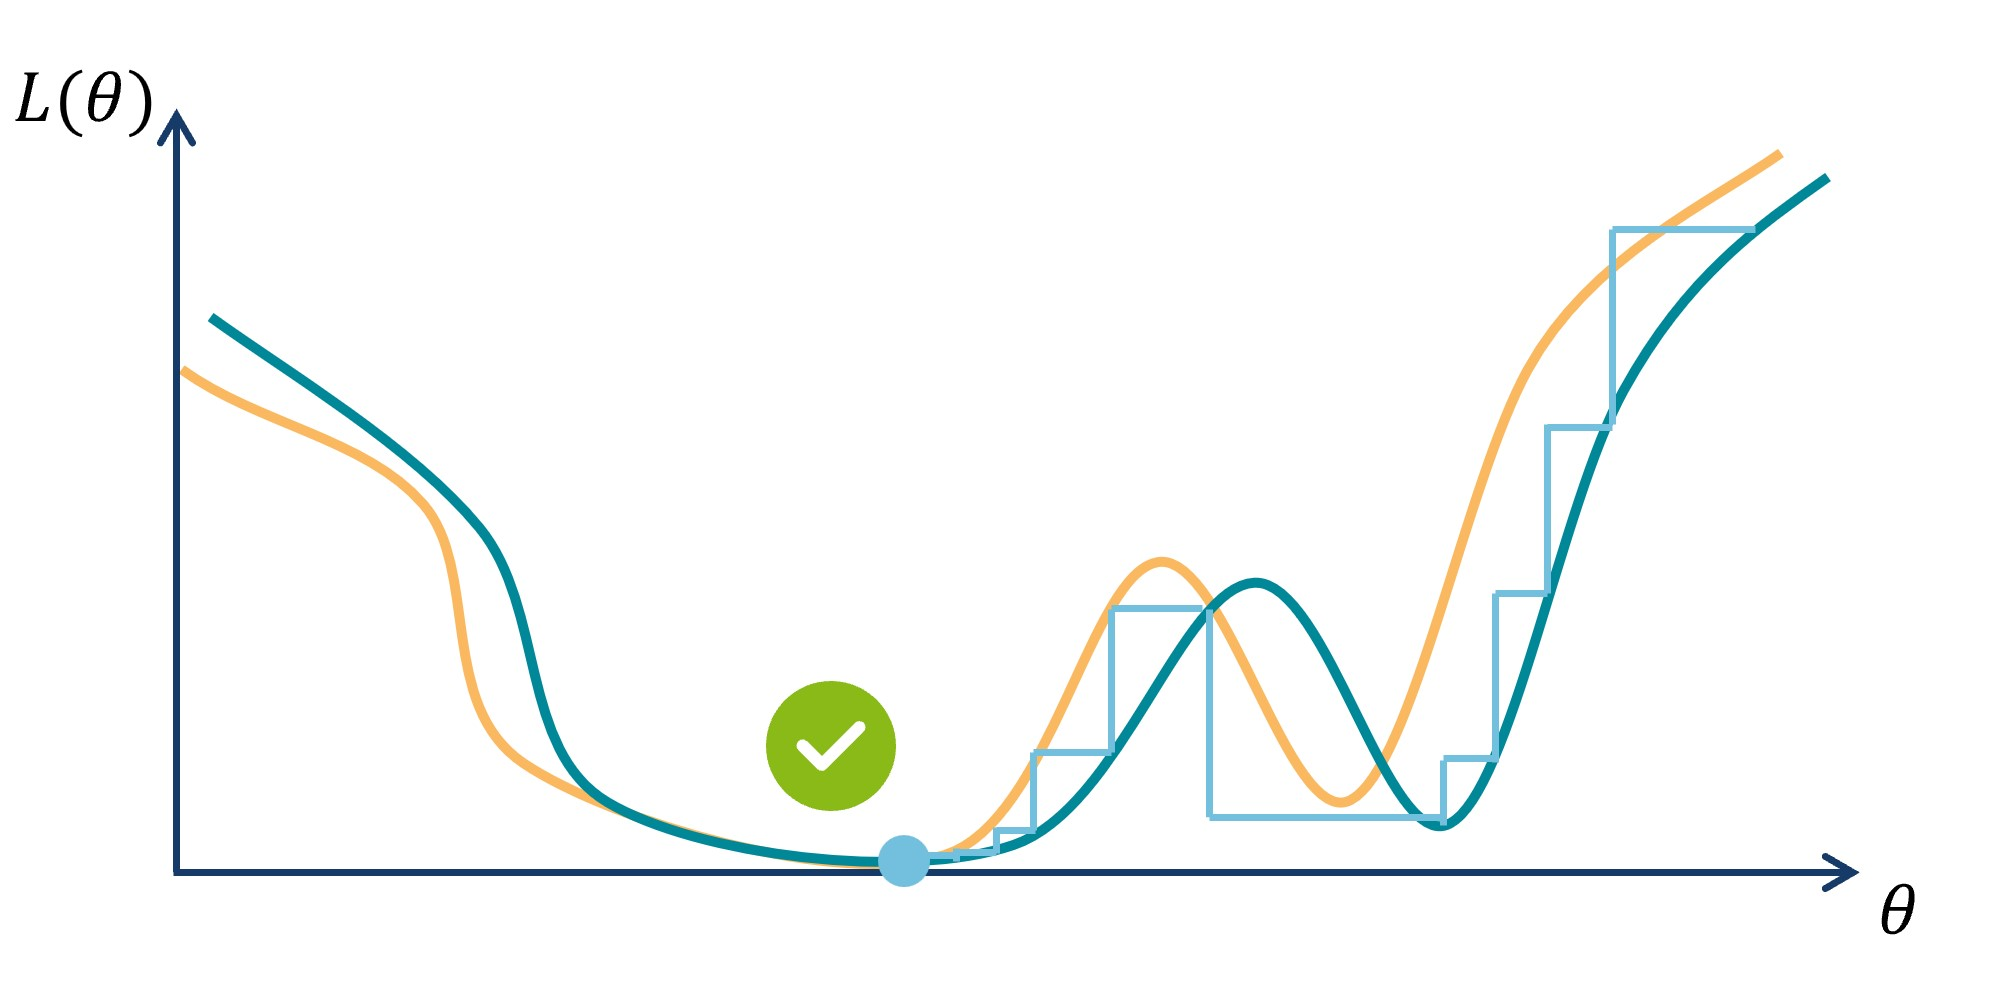
</p>

One approach is to use a technique called "priodic" or "cyclical" learning rate decay that alternates between a low learning rate and a high learning rate, allowing the model to explore different areas of the cost function. The intuition behind this approach is that the low learning rate allows the model to converge to local minima, while the high learning rate allows the model to escape from local minima and explore different areas of the cost function.

<p style="text-align: center">
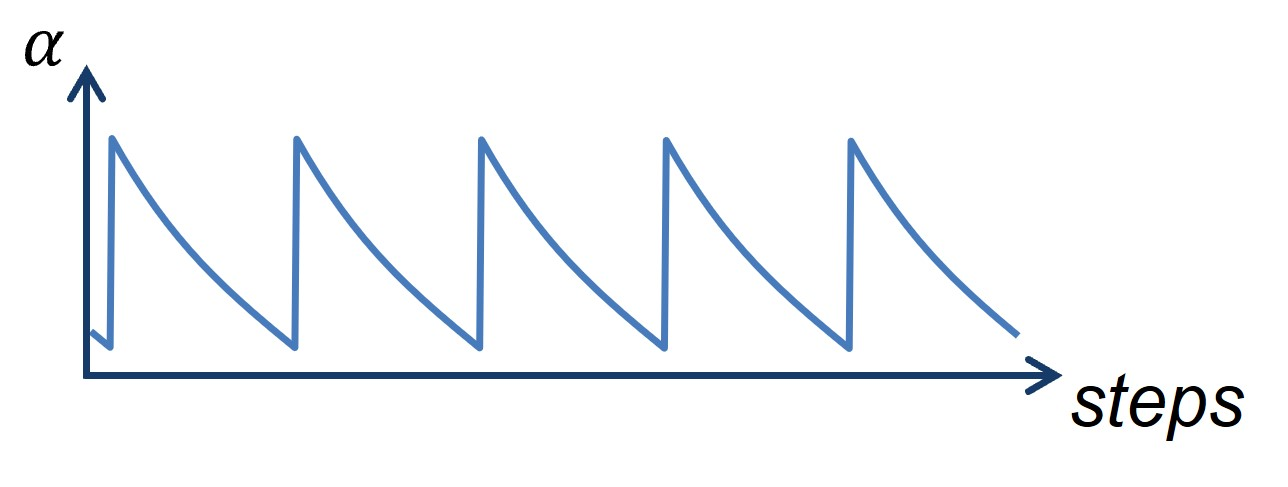
</p>

</ul>

<a class="textSolution">

## [Optional] MNIST investigations

Please import the necessary packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

One task of another exercise ended with a **trained MLP** with a **classification accuracy of > 95%** for the **MNIST** dataset. **Exemplary code is added here for your convenience**.

The following questions focus on the performance of the individual target classes with respect to the available training material. Make sure to understand the **changes in the `test_net` function** and how you can utilize them.

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 50)
        self.fc2 = nn.Linear(50, 25)
        self.fc3 = nn.Linear(25, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        out = F.log_softmax(self.fc3(x), dim=1)
        return out

    def train_net(self, criterion, optimizer, _trainloader, epochs):
        log_interval = 10
        for epoch in range(epochs):
            for batch_idx, (data, target) in enumerate(_trainloader):
                data, target = Variable(data), Variable(target)
                data = data.view(-1, 28 * 28)
                optimizer.zero_grad()
                net_out = self(data)
                loss = criterion(net_out, target)
                loss.backward()
                optimizer.step()
                if batch_idx % log_interval == 0:
                    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data),
                                                                                   _trainloader.batch_sampler.sampler.indices.size,
                                                                                   100. * batch_idx / len(_trainloader),
                                                                                   loss.data.item()))

    def test_net(self, criterion, _testloader):
        test_loss = 0
        correct = 0
        correct_class = np.zeros(10)
        for i_batch, (data, target) in enumerate(_testloader):
            data, target = Variable(data), Variable(target)
            data = data.view(-1, 28 * 28)
            net_out = self(data)
            test_loss += criterion(net_out, target).data.item()
            pred = net_out.data.max(1)[1]
            batch_labels = pred.eq(target.data)
            correct += batch_labels.sum()
            for i_label in range(len(target)):
                label = target[i_label].item()
                correct_class[label] += batch_labels[i_label].item()
        test_loss /= len(_testloader.dataset)
        acc = 100. * float(correct) / len(_testloader.dataset)
        acc_class = np.zeros(10)
        for i_label in range(10):
            num = (_testloader.dataset.targets.numpy() == i_label).sum()
            acc_class[i_label] = correct_class[
                                     i_label] / num if num > 0 else 1.0
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(test_loss, correct,
                                                                                     len(_testloader.dataset), acc))
        return acc, acc_class

Additionally, we provide the following plotting function. It can help you to **visualize your results**. Feel free to use it as given or make changes as you like.

In [3]:
def plot_accs(fractions, accs, accs_class):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    ax.plot(fractions, accs, marker='s')
    for i in range(10):
        ax2.plot(fractions, accs_class[:, i], marker='s', label=f'{i}')
    ax2.axhline(y=0.9, lw=2, ls='--', c='r')

    for ax in [ax, ax2]:
        ax.invert_xaxis()
        ax.set_xticks(fractions)
        ax.set_xlim(left=1.1)

    ax2.legend(loc=2)

    plt.tight_layout()
    plt.show()

### Load the dataset

Run the following code cell to **load the MNIST dataset**. 

In [4]:
transform = transforms.Compose([torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=4)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=4)

0.3%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




100.0%
100.0%

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



### Reduce the dataset

**Reduce the size of the training dataset in 10% increments** until only 10% of the training data remains. **Evaluate** your trained model **after each reduction step** and **plot the trend of model accuracy** against the amount of training data used.

**Additionally:** Examine whether there are **class-specific differences** in the dependence of model accuracy on the amount of training data. Are there classes that are still predicted well even with a small amount of data? Which class needs the most training data and which the least?

<a class="codeSolutionNextKeepComments">

In [5]:
# List of increments/fractions.
fractions = np.linspace(1, 0.1, 10)

# Dataset size.
num_train_samples = trainloader.dataset.data.size()[0]

# Print.
print("Fractions: {}".format(fractions))
print("Training dataset size: {}".format(num_train_samples))

Fractions: [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
Training dataset size: 60000


Now you only need to **train one model per increment** and **store the results** to evaluate them afterwards.

<a class="codeSolutionNextKeepComments">

In [6]:
# For every fraction.
for fraction in fractions:
    # Calcute the new train set size and generate a 'reduced' dataloader.
    reduced_train_size = int(fraction*num_train_samples)
    batch_sampler = torch.utils.data.sampler.SubsetRandomSampler(np.arange(reduced_train_size))
    trainloader_reduced = torch.utils.data.DataLoader(trainset, sampler=batch_sampler, batch_size=64, num_workers=4)

    # Generate a model.
    model = Net()
    print(model)

    # Train the model after creating an optimizer and criterion.
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
    criterion = nn.NLLLoss()
    model.train_net(criterion, optimizer, trainloader_reduced, 8)

    # Save the model state dict.
    torch.save(model.state_dict(), f"./data/net_{fraction}.pt")

Net(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=25, bias=True)
  (fc3): Linear(in_features=25, out_features=10, bias=True)
)
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.320513
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.292721
Train Epoch: 0 [1280/60000 (2%)]	Loss: 2.292234
Train Epoch: 0 [1920/60000 (3%)]	Loss: 2.254443
Train Epoch: 0 [2560/60000 (4%)]	Loss: 2.244046
Train Epoch: 0 [3200/60000 (5%)]	Loss: 2.174692
Train Epoch: 0 [3840/60000 (6%)]	Loss: 2.182265
Train Epoch: 0 [4480/60000 (7%)]	Loss: 2.161163
Train Epoch: 0 [5120/60000 (9%)]	Loss: 2.076328
Train Epoch: 0 [5760/60000 (10%)]	Loss: 2.009415
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.991487
Train Epoch: 0 [7040/60000 (12%)]	Loss: 1.868376
Train Epoch: 0 [7680/60000 (13%)]	Loss: 1.822100
Train Epoch: 0 [8320/60000 (14%)]	Loss: 1.594759
Train Epoch: 0 [8960/60000 (15%)]	Loss: 1.711774
Train Epoch: 0 [9600/60000 (16%)]	Loss: 1.510521
Train Epoch: 0 [10240/60000 (17%)]	Loss: 

**Evaluate** the resulting models and **save the results**, e.g. in txt-files.

<a class="codeSolutionNextKeepComments">

In [7]:
# Generate a list for overall accuary values and class accuracy values respectively.
accs = []
accs_class = []

# Load the model for every fraction and utilize the test_net function to receive the accuracies.
for fraction in fractions:
    model = Net()
    model.load_state_dict(torch.load(f"./data/net_{fraction}.pt"))
    model.eval()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
    criterion = nn.NLLLoss()
    acc, acc_class = model.test_net(criterion, testloader)
    accs.append(acc)
    accs_class.append(acc_class)

# Save the collected data.
np.savetxt("./data/accs.txt", accs)
np.savetxt("./data/accs_class.txt", accs_class)


Test set: Average loss: 0.0048, Accuracy: 9536/10000 (95.36%)


Test set: Average loss: 0.0055, Accuracy: 9472/10000 (94.72%)


Test set: Average loss: 0.0054, Accuracy: 9468/10000 (94.68%)


Test set: Average loss: 0.0061, Accuracy: 9438/10000 (94.38%)


Test set: Average loss: 0.0067, Accuracy: 9354/10000 (93.54%)


Test set: Average loss: 0.0073, Accuracy: 9345/10000 (93.45%)


Test set: Average loss: 0.0078, Accuracy: 9268/10000 (92.68%)


Test set: Average loss: 0.0095, Accuracy: 9070/10000 (90.70%)


Test set: Average loss: 0.0106, Accuracy: 9030/10000 (90.30%)


Test set: Average loss: 0.0123, Accuracy: 8837/10000 (88.37%)



**Plot the evaluation results** utilizing the provided `plot_accs` function or one of your own functions.

<a class="codeSolutionNextKeepComments">

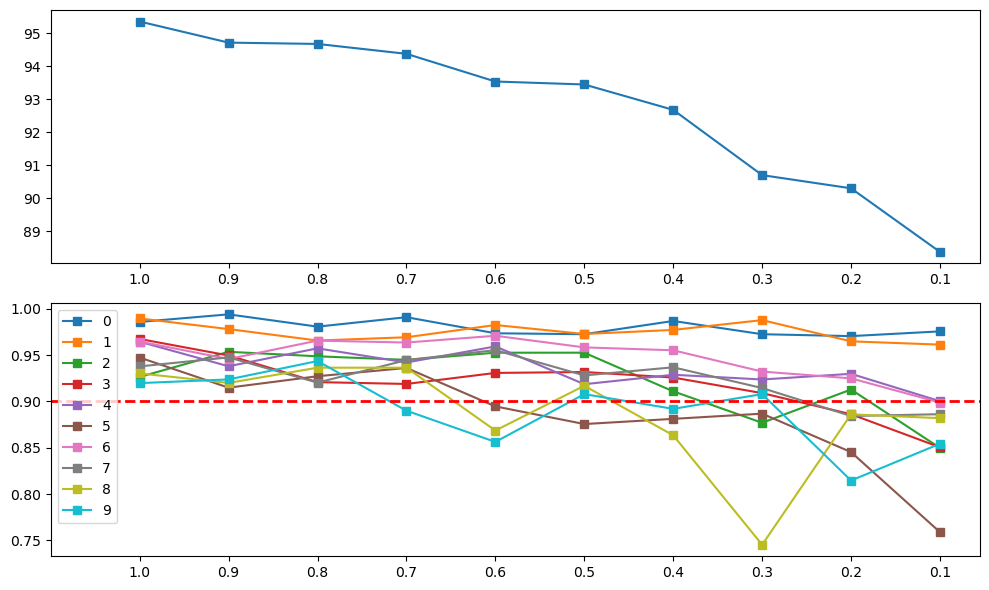

In [8]:
# Load the accuracy values.
accs = np.loadtxt("./data/accs.txt")
accs_class = np.loadtxt("./data/accs_class.txt")

# Create the plot.
plot_accs(fractions, accs, accs_class)

### Minimal dataset

Now that you have investigated the class-specific differences, **choose the minimum amount of training data per class** so that **each class** is predicted with an **accuracy of > 90%**.

First, let's fix a specific random seed to get reproducible results.

In [9]:
seed = 1
np.random.seed(seed)
torch.manual_seed(seed)
print("Random seed: {}".format(seed))

Random seed: 1


Set the fraction per class and get the number of overall training samples.

<a class="codeSolutionNext">

In [10]:
class_train_sizes = [0.08, 0.08, 0.40, 0.4, 0.4, 0.55, 0.2, 0.3, 0.55, 0.4]
num_train_samples = trainloader.dataset.data.size()[0]

Generate a **training data ID-list for each clas**s separately and **aggregate** them into **one dataloader for training**.

<a class="codeSolutionNext">

In [11]:
sample_idx_list = []
for i in range(10):
    class_idx_list = np.squeeze(np.argwhere(trainloader.dataset.targets.numpy() == i))
    sample_idx_list += np.random.choice(class_idx_list, size=int(class_train_sizes[i]*len(class_idx_list)), replace=False).tolist()
batch_sampler = torch.utils.data.sampler.SubsetRandomSampler(np.array(sample_idx_list))
trainloader_reduced = torch.utils.data.DataLoader(trainset, sampler=batch_sampler, batch_size=64, num_workers=4)

**Create** a **model** and **train** it utilizing the dataloader. You should store the result to have access to them even after ending the current session.

<a class="codeSolutionNextKeepComments">

In [12]:
# Create model, train, and save the state dict.
model = Net()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.NLLLoss()
model.train_net(criterion, optimizer, trainloader_reduced, 10)
torch.save(model.state_dict(), "./data/net_custom.pt")

Train Epoch: 0 [0/19823 (0%)]	Loss: 2.363297
Train Epoch: 0 [640/19823 (3%)]	Loss: 2.250294
Train Epoch: 0 [1280/19823 (6%)]	Loss: 2.260929
Train Epoch: 0 [1920/19823 (10%)]	Loss: 2.238613
Train Epoch: 0 [2560/19823 (13%)]	Loss: 2.105531
Train Epoch: 0 [3200/19823 (16%)]	Loss: 2.081902
Train Epoch: 0 [3840/19823 (19%)]	Loss: 2.051698
Train Epoch: 0 [4480/19823 (23%)]	Loss: 2.083655
Train Epoch: 0 [5120/19823 (26%)]	Loss: 1.840590
Train Epoch: 0 [5760/19823 (29%)]	Loss: 1.921173
Train Epoch: 0 [6400/19823 (32%)]	Loss: 1.755888
Train Epoch: 0 [7040/19823 (35%)]	Loss: 1.595344
Train Epoch: 0 [7680/19823 (39%)]	Loss: 1.560960
Train Epoch: 0 [8320/19823 (42%)]	Loss: 1.559893
Train Epoch: 0 [8960/19823 (45%)]	Loss: 1.375707
Train Epoch: 0 [9600/19823 (48%)]	Loss: 1.299289
Train Epoch: 0 [10240/19823 (52%)]	Loss: 1.286686
Train Epoch: 0 [10880/19823 (55%)]	Loss: 1.387452
Train Epoch: 0 [11520/19823 (58%)]	Loss: 1.168498
Train Epoch: 0 [12160/19823 (61%)]	Loss: 1.304396
Train Epoch: 0 [12800/1

**Evaluate the model** and check the overall accuracy as well as the accuracy on each individual class.

<a class="codeSolutionNextKeepComments">

In [13]:
# Load the model state dict (if saved before)
model = Net()
model.load_state_dict(torch.load('./data/net_custom.pt'))

# Evaluate the model.
model.eval()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.NLLLoss()
acc, acc_class = model.test_net(criterion, testloader)

# Print the results.
print("Overall accuracy: {}% \n".format(acc))
for i in range(10):
    print("Class {} accuracy: {:.2f}%".format(i, acc_class[i]*100))


Test set: Average loss: 0.0084, Accuracy: 9212/10000 (92.12%)

Overall accuracy: 92.12% 

Class 0 accuracy: 90.61%
Class 1 accuracy: 91.72%
Class 2 accuracy: 94.86%
Class 3 accuracy: 92.08%
Class 4 accuracy: 94.91%
Class 5 accuracy: 92.04%
Class 6 accuracy: 91.65%
Class 7 accuracy: 91.34%
Class 8 accuracy: 91.48%
Class 9 accuracy: 90.49%


---

**Last update:** 2023-04-26

**Version:** 2.0

**Copyright** © Bergische Universität Wuppertal